# Name :  AlexNet_CIFAR10.ipynb
Alexnet Arcitecture for CIFAR10 dataset classification

In [ ]:
from tensorflow.keras.datasets.cifar10 import load_data

Load Data

In [ ]:
(TrainX, TrainY), (TestX, TestY) = load_data()

PreProcessing

In [ ]:
#Normalization
from numpy import asarray
TrainX = TrainX.astype('float32')/255
TestX = TestX.astype('float32')/255

In [ ]:
#Validation
val_x, val_y = TrainX[:5000],TrainY[:5000]

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation

# Step 1 : Define the model

In [ ]:

AlexNet = Sequential()

#1st Conv Layer
AlexNet.add(Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), padding='same', input_shape=(32,32,3)))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPool2D(pool_size=(2,2), strides=(2,2), padding='same'))

#2st Conv Layer
AlexNet.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding='same' ))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPool2D(pool_size=(2,2), strides=(2,2), padding='same'))

#3st Conv Layer
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same' ))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

#4st Conv Layer
AlexNet.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same' ))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

AlexNet.add(Flatten())

#1st FC Layer
AlexNet.add(Dense(4096))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

AlexNet.add(Dropout(0.4))

#2st FC Layer
AlexNet.add(Dense(4096))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

AlexNet.add(Dropout(0.4))


#3st FC Layer
AlexNet.add(Dense(1000))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

AlexNet.add(Dropout(0.4))

#output layer
AlexNet.add(Dense(10))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('softmax'))


# Step 2: Compile the model

In [ ]:
import tensorflow as tf
opt = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
AlexNet.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])


# Step 3: Fit the model

In [ ]:
history=AlexNet.fit(x=TrainX, y=TrainY, epochs=50, batch_size=100, validation_data=(val_x, val_y))

Epoch 1/50
500/500 [==============================] - 16s 19ms/step - loss: 1.6438 - accuracy: 0.4063 - val_loss: 1.7289 - val_accuracy: 0.4044
Epoch 2/50
500/500 [==============================] - 9s 18ms/step - loss: 1.3097 - accuracy: 0.5328 - val_loss: 1.2544 - val_accuracy: 0.5552
Epoch 3/50
500/500 [==============================] - 9s 18ms/step - loss: 1.1599 - accuracy: 0.5913 - val_loss: 1.2593 - val_accuracy: 0.5370
Epoch 4/50
500/500 [==============================] - 9s 18ms/step - loss: 1.0528 - accuracy: 0.6290 - val_loss: 1.2483 - val_accuracy: 0.5326
Epoch 5/50
500/500 [==============================] - 9s 17ms/step - loss: 0.9651 - accuracy: 0.6631 - val_loss: 0.9764 - val_accuracy: 0.6470
Epoch 6/50
500/500 [==============================] - 9s 17ms/step - loss: 0.8877 - accuracy: 0.6916 - val_loss: 1.1427 - val_accuracy: 0.6238
Epoch 7/50
500/500 [==============================] - 9s 17ms/step - loss: 0.8191 - accuracy: 0.7167 - val_loss: 1.2105 - val_accuracy: 0.575

In [ ]:
AlexNet.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 8, 8, 96)          34944     
                                                                 
 batch_normalization (BatchN  (None, 8, 8, 96)         384       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 8, 8, 96)          0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 4, 4, 96)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 4, 4, 256)         614656    
                                                                 
 batch_normalization_1 (Batc  (None, 4, 4, 256)        1

In [ ]:
loss, acc = AlexNet.evaluate(TestX ,TestY)
print('Accuracy:', acc*100)
print('Loss:', loss)


313/313 [==============================] - 2s 5ms/step - loss: 2.0217 - accuracy: 0.6555
Accuracy: 65.54999947547913
Loss: 2.0217347145080566


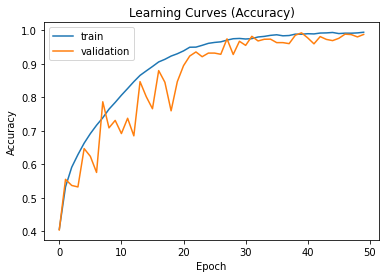

In [ ]:
import matplotlib.pyplot as plt
plt.title('Learning Curves (Accuracy)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.legend()
plt.show()


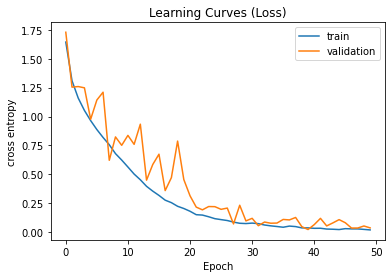

In [ ]:
import matplotlib.pyplot as plt
plt.title('Learning Curves (Loss)')
plt.xlabel('Epoch')
plt.ylabel('cross entropy')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show()